In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 1. データ準備

In [62]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
              'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')

# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]

# データ取得が可能な年度のリスト
years = [2014,2015,2016,2017,2018]

teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

In [63]:
# 勝敗を数値（敗：0 勝：1）へ変換する関数
def match_result_classify(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [64]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
def combine_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                             sep=',',names=col_header,usecols=col_num)

            # NaNと引き分けを除外
            for i in range(len(df)):
                if pd.isnull(df.loc[i,'Result']) or df.loc[i,'Result'] == '△':
                    df = df.drop(i)

            # 関数match_result_classifyを適用
            df['Result'] = df['Result'].apply(match_result_classify)

            df_all = pd.concat([df_all,df],ignore_index=True)
            
    return df_all

In [65]:
df_all = combine_match_results()
df_all.head()

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
0,V,"26,236",1,2,18,9,1,1,12,8,0,2,2,7
1,V,"23,100",1,2,17,14,2,3,9,4,0,0,0,7
2,V,"38,561",0,2,16,8,0,1,9,6,0,2,2,8
3,V,"17,681",1,2,17,11,2,0,5,10,0,3,3,9
4,V,"19,129",1,2,16,10,1,1,4,6,1,4,3,8


In [66]:
df_all.tail()

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
8425,V,"28,312",1,3,1,8,0,0,12,3,0,0,0,13
8426,V,"27,935",1,4,0,8,0,0,5,4,0,1,1,3
8427,V,"45,993",0,4,-1,5,2,0,4,5,1,3,3,13
8428,V,"45,963",0,3,0,12,1,0,9,11,1,8,8,10
8429,V,"46,318",1,2,1,13,2,0,7,8,0,1,1,7


In [67]:
len(df_all)

8430

In [68]:
# 勝敗でグループ化して平均値を算出
df_all.groupby('Result').mean()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
Result,,,,,,,,,,,
0,3.812574,-1.959668,7.200949,0.548043,0.444365,7.426809,9.904626,1.112930,5.737841,5.208541,6.677817
1,3.190985,1.969158,9.903677,1.112693,0.706524,6.677817,7.201423,0.548043,2.372479,2.174377,7.426809


# 2. データの可視化

### 勝敗に関係がありそうな変数を探す

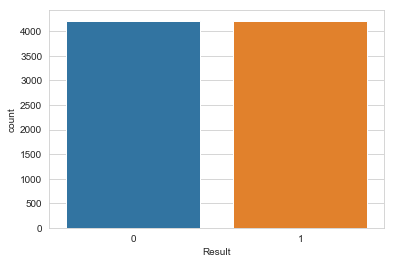

In [69]:
# 勝敗数をプロット
sns.countplot('Result',data=df_all)

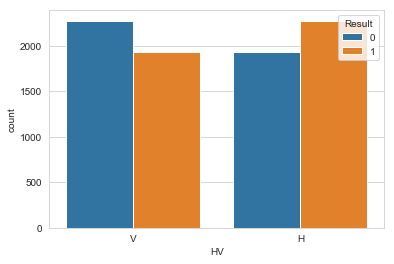

In [70]:
# HV(ホームorビジター)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('HV',data=df_all,hue='Result')

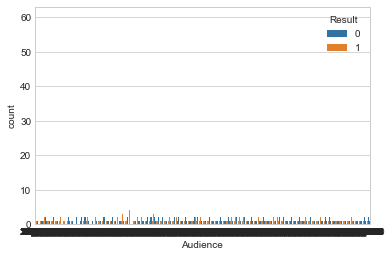

In [11]:
# Audience(動員数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Audience',data=df_all,hue='Result')

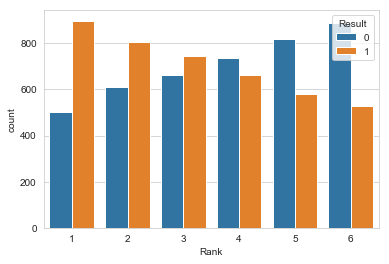

In [71]:
# Rank(順位)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Rank',data=df_all,hue='Result')

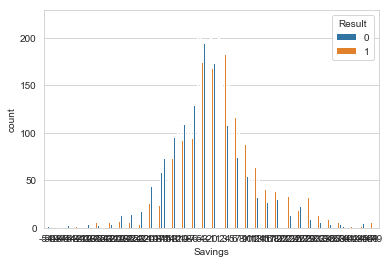

In [72]:
# Savings(貯金数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Savings',data=df_all,hue='Result')

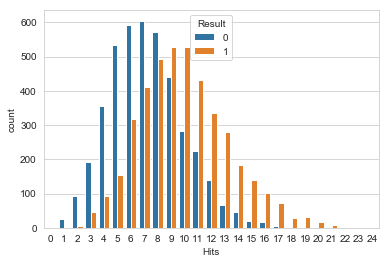

In [73]:
# Hits(安打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Hits',data=df_all,hue='Result')

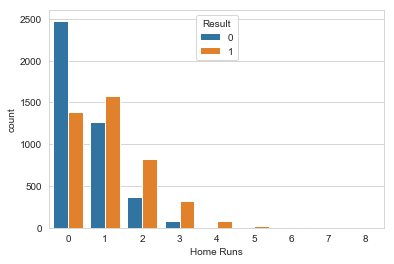

In [74]:
# Home Runs(本塁打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Home Runs',data=df_all,hue='Result')

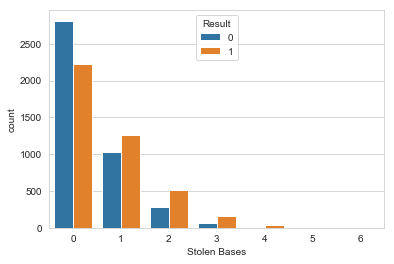

In [75]:
# Stolen Bases(盗塁数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Stolen Bases',data=df_all,hue='Result')

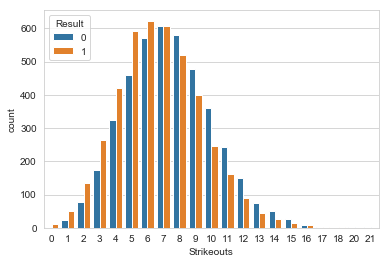

In [76]:
# Strikeouts(三振数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Strikeouts',data=df_all,hue='Result')

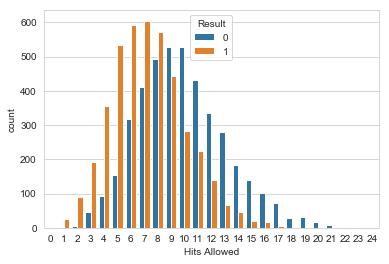

In [77]:
# Hits Allowed(被安打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Hits Allowed',data=df_all,hue='Result')

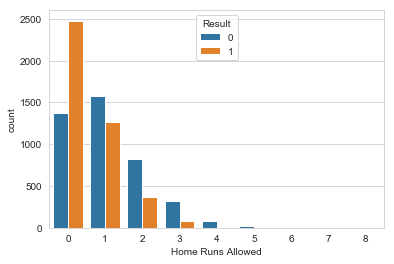

In [78]:
# Home Runs Allowed(被本塁打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Home Runs Allowed',data=df_all,hue='Result')

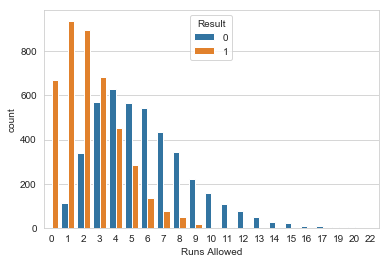

In [79]:
# Runs Allowed(失点数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Runs Allowed',data=df_all,hue='Result')

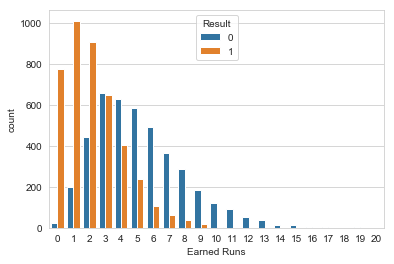

In [80]:
# Earned Runs(自責点数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Earned Runs',data=df_all,hue='Result')

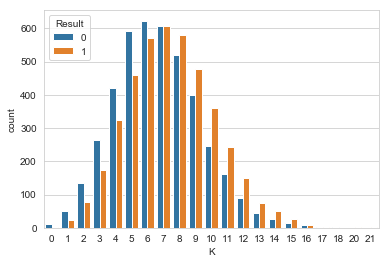

In [81]:
# K(奪三振数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('K',data=df_all,hue='Result')

## 3. データの前処理

In [82]:
# カテゴリーを表現する変数をダミー変数に展開
hv_dummies = pd.get_dummies(df_all['HV'])
hv_dummies.head()

,H,V
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [83]:
# 行数の確認
print(len(hv_dummies))
print(len(df_all))

8430
8430


In [84]:
# 元のHV列は不要
# Resultは目的変数のため不要
# 勝敗との関係がありそうにない変数（Audience,K）も不要
X = df_all.drop(['HV','Result','Audience','K'],axis=1)

In [85]:
# ダミー変数を連結して説明変数のDataFrameを作成
X = pd.concat([X,hv_dummies], axis=1)

In [86]:
X.head()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,H,V
0,2,18,9,1,1,12,8,0,2,2,0,1
1,2,17,14,2,3,9,4,0,0,0,0,1
2,2,16,8,0,1,9,6,0,2,2,0,1
3,2,17,11,2,0,5,10,0,3,3,0,1
4,2,16,10,1,1,4,6,1,4,3,0,1


In [87]:
# Yに目的変数を格納
Y = df_all.Result
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Result, dtype: int64

In [88]:
# 目的変数をリストに変換
Y = Y.values
Y

array([1, 1, 0, ..., 0, 0, 1])

## 4. scikit-learnを使ったロジススティック回帰

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
# 性能の評価用
from sklearn import metrics

In [90]:
log_model = LogisticRegression()

In [91]:
# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
# モデルの精度を確認
log_model.score(X,Y)

0.8879003558718861

In [93]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Rank,-0.199242
1,Savings,0.000840366
2,Hits,0.633547
3,Home Runs,1.23006
4,Stolen Bases,0.315896
5,Strikeouts,-0.117765
6,Hits Allowed,0.0135981
7,Home Runs Allowed,-0.0927941
8,Runs Allowed,-1.26651
9,Earned Runs,0.0264966


## 5. 学習とテスト

In [94]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [95]:
# 新しいモデルを作成
log_model2 = LogisticRegression()

In [96]:
# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([0, 0, 1, ..., 0, 1, 1])

In [98]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.8904174573055028


### →説明変数のデータが揃っている場合は、約88%の確率で勝敗予想が当たる。
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 6. 説明変数をもっと絞る

In [99]:
X = df_all.drop(['Result','Rank','Savings','Stolen Bases','Strikeouts','Hits Allowed',
                        'Home Runs Allowed','Earned Runs','HV','Audience','K'],axis=1)

In [100]:
X.head()

,Hits,Home Runs,Runs Allowed
0,9,1,2
1,14,2,0
2,8,0,2
3,11,2,3
4,10,1,4


In [101]:
# Yに目的変数を格納
Y = df_all.Result
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Result, dtype: int64

In [102]:
# 目的変数をリストに変換
Y = Y.values
Y

array([1, 1, 0, ..., 0, 0, 1])

In [103]:
log_model = LogisticRegression()
# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Hits,0.633988
1,Home Runs,1.18232
2,Runs Allowed,-1.22216


In [105]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 新しいモデルを作成
log_model2 = LogisticRegression()

# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([1, 0, 0, ..., 0, 1, 0])

In [107]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.8804554079696395


## →安打数、本塁打数、失点数だけでも割と当たる
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [108]:
X = df_all.drop(['Result','Rank','Savings','Stolen Bases','Strikeouts','Hits Allowed',
                        'Home Runs Allowed','Earned Runs','HV','Audience','K','Runs Allowed'],axis=1)

In [109]:
X.head()

,Hits,Home Runs
0,9,1
1,14,2
2,8,0
3,11,2
4,10,1


In [110]:
# Yに目的変数を格納
Y = df_all.Result
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Result, dtype: int64

In [111]:
log_model = LogisticRegression()
# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Hits,0.257376
1,Home Runs,0.462796


In [113]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 新しいモデルを作成
log_model2 = LogisticRegression()

# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([0, 0, 0, ..., 0, 0, 1])

In [115]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.6911764705882353


## →やはり失点数は重要？
## →安打数と本塁打数の組み合わせが微妙？
<br/>
<br/>
<br/>
<br/>
<br/>

In [116]:
X = df_all.drop(['Result','Rank','Savings','Stolen Bases','Strikeouts','Hits Allowed',
                        'Home Runs Allowed','Earned Runs','HV','Audience','K','Home Runs'],axis=1)

In [117]:
X.head()

,Hits,Runs Allowed
0,9,2
1,14,0
2,8,2
3,11,3
4,10,4


In [118]:
# Yに目的変数を格納
Y = df_all.Result

In [119]:
log_model = LogisticRegression()
# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Hits,0.647544
1,Runs Allowed,-1.04777


In [121]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 新しいモデルを作成
log_model2 = LogisticRegression()

# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([0, 1, 1, ..., 0, 0, 1])

In [123]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.8595825426944972


## →本塁打数はそれほど重要じゃない？
## →安打数と失点数の組み合わせがなかなか良い？
<br/>
<br/>
<br/>
<br/>
<br/>

In [124]:
X = df_all.drop(['Result','Rank','Savings','Stolen Bases','Strikeouts','Hits Allowed',
                        'Home Runs Allowed','Earned Runs','HV','Audience','K','Hits'],axis=1)

In [125]:
X.head()

,Home Runs,Runs Allowed
0,1,2
1,2,0
2,0,2
3,2,3
4,1,4


In [126]:
# Yに目的変数を格納
Y = df_all.Result

In [127]:
log_model = LogisticRegression()
# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Home Runs,1.29611
1,Runs Allowed,-0.784529


In [129]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# 新しいモデルを作成
log_model2 = LogisticRegression()

# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([1, 0, 0, ..., 1, 0, 1])

In [131]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.7993358633776091


## →安打数はそれほど重要じゃない？
## →本塁打数と失点数の組み合わせがまあまあ？